# Anotações

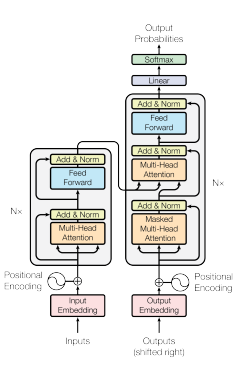

- Cada bloco desse vai ser detalhado no prox capítulo, mas por agora
    - Embedding
        - texto para representação numérica
            - que mantem ordem das palavras, ideia sobre contexto, sequencia de entrada
        - tema  entrada e saída pois entra texto e sai texto
            - a ideia é sempre prever a saida com mais probabilidade, supervisionadamente
    - Scale dot product 
        - operação coração do attention mechanism

- Do lado esquerdo temos o encoder e do direito o decoder
    - tem um aprendizado paralelo do encoder com o decoder e em algum momento eu alimento a saida do encoder para o decoder e segue até o final da inferencia 

- A grande novidade estão no Multi-Head Attention
    - esse é o grande diferencial da arquitetura
    - voce estabelece um cirterio que o modelo aprende o que é mais importante dependendo da sequencia
        - a ideia é aprender por exemplo que depois de um artigo vem um substantivo

# Imports


In [2]:
import torch
from torch import nn

In [7]:
class Transformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_heads, n_layers, dropout):
        
        super().__init__()
        
        # hiperparametros
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.n_heads = n_heads
        self.n_layers = n_layers
        self.dropout = dropout
        
        # criacao de camadas
        
        # matriz com duas dimensoes que vai mapear entrada para sequencia de saida
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # mecanismo de auto-atencao
        self.attention = nn.MultiheadAttention(embedding_dim, n_heads, dropout=dropout)
        
        # definindo camadas para gerar sequencia de saida a partir da entrada
        self.feed_forward = nn.Sequential(
            nn.Linear(embedding_dim, embedding_dim),
            nn.ReLU(),
            nn.Linear(embedding_dim, embedding_dim)
        )
        
        # transforma a sequencia de saida na forma desejada
        self.out = nn.Linear(embedding_dim, embedding_dim)
    
    # x é exatamente o que recebi como entrada
    def forward(self, x):
        
        x = self.embedding(x)
        
        x = self.attention(x)
        
        x = self.feed_forward(x)
        
        x = self.out(x)
        
        return x
    
# esse exemplo não é totalmente funcional pq não tá incluido o bp nem o encoder e decoder

In [8]:
modelo = Transformer(vocab_size=1000,
                     embedding_dim=32,
                     n_heads=4,
                     n_layers=2,
                     dropout=0.5)

In [9]:
modelo.modules

<bound method Module.modules of Transformer(
  (embedding): Embedding(1000, 32)
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
  )
  (feed_forward): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (out): Linear(in_features=32, out_features=32, bias=True)
)>

In [12]:
modelo.attention

MultiheadAttention(
  (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
)

- isso é o que tá acontecendo em uma cabeça apenas(qkv, o coraçao de fato nessa multiplicação de matrizes)

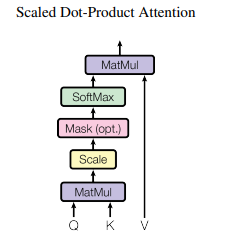

- e aí junta varias cabeças em um multi-head attention
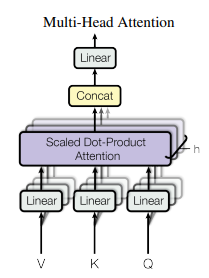